<a href="https://colab.research.google.com/github/d9249/DACON/blob/main/CVLC_06_InceptionResNetV2(public__private_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [105]:
train = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/test.csv')
sub = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/submission.csv')

In [ ]:
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/0
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/1
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/2
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/3
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/4
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/5
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/6
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/7
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/8
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_train/9
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_test

In [107]:
import cv2

for idx in range(len(train)) :
    img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
    digit = train.loc[idx, 'digit']
    cv2.imwrite(f'/content/drive/MyDrive/DACON_CVLC/data/images_train/{digit}/{train["id"][idx]}.png', img)

for idx in range(len(test)) :
    img = test.loc[idx, '0':].values.reshape(28, 28).astype(int)
    cv2.imwrite(f'/content/drive/MyDrive/DACON_CVLC/data/images_test/{test["id"][idx]}.png', img)

In [108]:
model =  tf.keras.applications.InceptionResNetV2(weights=None, include_top=True, input_shape=(224, 224, 1), classes=10)

In [109]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.002,epsilon=None), metrics=['accuracy'])

In [110]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                             rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1)

train_generator = datagen.flow_from_directory('/content/drive/MyDrive/DACON_CVLC/data/images_train', target_size=(224,224), color_mode='grayscale', class_mode='categorical', subset='training')
val_generator = datagen.flow_from_directory('/content/drive/MyDrive/DACON_CVLC/data/images_train', target_size=(224,224), color_mode='grayscale', class_mode='categorical', subset='validation')

Found 1642 images belonging to 10 classes.
Found 406 images belonging to 10 classes.


In [111]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(f'/content/drive/MyDrive/DACON_CVLC/Checkpoint/model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)

In [112]:
model.fit_generator(train_generator, epochs=5, validation_data=val_generator, callbacks=[checkpoint])

Epoch 1/5
52/52 [==============================] - 36s 407ms/step - loss: 2.1102 - accuracy: 0.2850 - val_loss: 3.3244 - val_accuracy: 0.0985

Epoch 00001: val_accuracy improved from -inf to 0.09852, saving model to /content/drive/MyDrive/DACON_CVLC/Checkpoint/model.h5
Epoch 2/5
52/52 [==============================] - 19s 357ms/step - loss: 1.2725 - accuracy: 0.5572 - val_loss: 17.1637 - val_accuracy: 0.1034

Epoch 00002: val_accuracy improved from 0.09852 to 0.10345, saving model to /content/drive/MyDrive/DACON_CVLC/Checkpoint/model.h5
Epoch 3/5
52/52 [==============================] - 19s 364ms/step - loss: 0.9574 - accuracy: 0.6717 - val_loss: 5.4484 - val_accuracy: 0.0985

Epoch 00003: val_accuracy did not improve from 0.10345
Epoch 4/5
52/52 [==============================] - 19s 364ms/step - loss: 0.8473 - accuracy: 0.7162 - val_loss: 5.0813 - val_accuracy: 0.0985

Epoch 00004: val_accuracy did not improve from 0.10345
Epoch 5/5
52/52 [==============================] - 19s 357ms

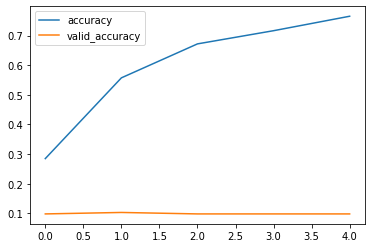

In [113]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"], label='accuracy')
plt.plot(model.history.history["val_accuracy"], label='valid_accuracy')

plt.legend()
plt.show()

In [114]:
model = tf.keras.models.load_model('/content/drive/MyDrive/DACON_CVLC/Checkpoint/model.h5', compile=False)

In [115]:
!mkdir /content/drive/MyDrive/DACON_CVLC/data/images_test/none
!mv /content/drive/MyDrive/DACON_CVLC/data/images_test/*.png /content/drive/MyDrive/DACON_CVLC/data/images_test/none

mkdir: cannot create directory ‘/content/drive/MyDrive/DACON_CVLC/data/images_test/none’: File exists


In [116]:
datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory('/content/drive/MyDrive/DACON_CVLC/data/images_test', target_size=(224,224), color_mode='grayscale', class_mode='categorical', shuffle=False)

Found 20480 images belonging to 1 classes.


In [117]:
test_generator.reset()
predict = model.predict_generator(test_generator).argmax(axis=1)

In [118]:
submission = pd.read_csv('/content/drive/MyDrive/DACON_CVLC/data/submission.csv')
submission['digit'] = predict
submission.to_csv('/content/drive/MyDrive/DACON_CVLC/Submission/submission.csv', index=False)